In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

import os
import cv2
from PIL import Image
import numpy as np


In [2]:


image_directory = '/content/drive/MyDrive/pots/PlantVillage/'
SIZE = 256
dataset = []  # List for storing images
label = []    # List for storing labels

# Load Healthy Images
healthy_images = os.listdir(image_directory + 'Potato___healthy/')
for image_name in healthy_images:
    if os.path.splitext(image_name)[1].lower() == '.jpg':  # Safely check for jpg
        image = cv2.imread(image_directory + 'Potato___healthy/' + image_name)
        if image is not None:
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(0)  # Healthy label

# Load Early Blight Images
earlyblight_images = os.listdir(image_directory + 'Potato___Early_blight/')
for image_name in earlyblight_images:
    if os.path.splitext(image_name)[1].lower() == '.jpg':
        image = cv2.imread(image_directory + 'Potato___Early_blight/' + image_name)
        if image is not None:
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(1)

# Load Late Blight Images
lateblight_images = os.listdir(image_directory + 'Potato___Late_blight/')
for image_name in lateblight_images:
    if os.path.splitext(image_name)[1].lower() == '.jpg':
        image = cv2.imread(image_directory + 'Potato___Late_blight/' + image_name)
        if image is not None:
            image = Image.fromarray(image, 'RGB')
            image = image.resize((SIZE, SIZE))
            dataset.append(np.array(image))
            label.append(2)  # Late Blight label

# Convert lists to NumPy arrays
dataset = np.array(dataset)
labels = np.array(label)

# Check the shape of the dataset and labels
print("Dataset shape:", dataset.shape)
print("Labels shape:", labels.shape)


Dataset shape: (2152, 256, 256, 3)
Labels shape: (2152,)


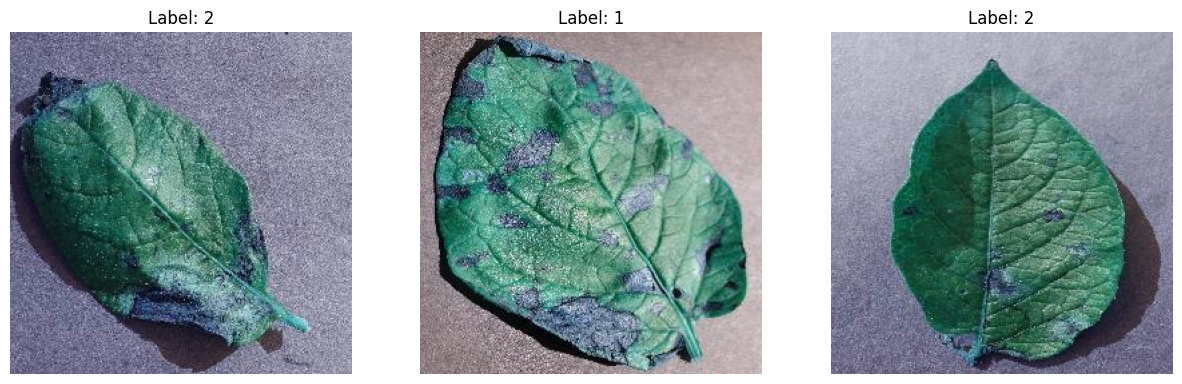

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and the subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Loop to display 3 random images
for i in range(3):
    num = random.randint(0, len(dataset) - 1)

    # Display the image in the corresponding subplot
    axs[i].imshow(np.reshape(dataset[num], (256, 256, 3)))

    # Set the title to show the label for this image
    axs[i].set_title(f"Label: {labels[num]}")

    # Remove the axes ticks for a cleaner look
    axs[i].axis('off')

# Show the plot
plt.show()


label for this image: 2


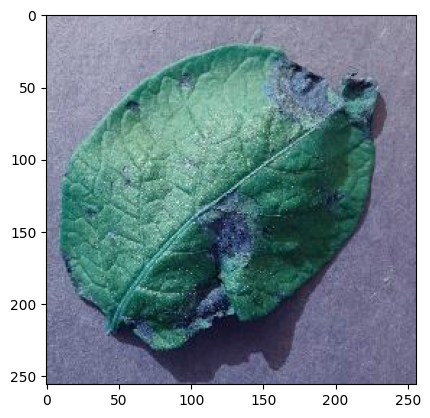

In [4]:
import random
num = random.randint(0, len(dataset)-1)
plt.imshow(np.reshape(dataset[num],(256,256,3)))
print("label for this image:", label[num])

In [5]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 42)

# Convert y_train and y_test to NumPy arrays
#y_train = np.array(y_train)
#y_test = np.array(y_test)

print(X_train.shape)
print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

(1721, 256, 256, 3)
(431, 256, 256, 3)


In [6]:
X_train = X_train/255
X_test = X_test/ 255

In [7]:
print(y_train[5])
print(y_train[15])
print(y_train[7])
print(y_train[55])

2
0
1
1


In [8]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [9]:
print(y_train_cat[5])
print(y_train_cat[15])
print(y_train_cat[7])
print(y_train_cat[55])

[0. 0. 1.]
[1. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]


In [10]:
activation = 'relu'
model = Sequential()
model.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (256, 256, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation = activation, kernel_initializer = 'he_uniform'))

model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      33,554,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,621,283 (128.26 MB)

 Trainable params: 33,620,899 (128.25 MB)

 Non-trainable params: 384 (1.50 KB)

None


In [11]:
history = model.fit(
    X_train,
    y_train_cat,
    batch_size=64,
    verbose=2,
    epochs=100,
    validation_data=(X_test, y_test_cat),
    shuffle=False)


Epoch 1/100
27/27 - 62s - 2s/step - accuracy: 0.7984 - loss: 0.8738 - val_accuracy: 0.4501 - val_loss: 1.6417
Epoch 2/100
27/27 - 8s - 288ms/step - accuracy: 0.8716 - loss: 0.3839 - val_accuracy: 0.4501 - val_loss: 1.9215
Epoch 3/100
27/27 - 10s - 382ms/step - accuracy: 0.8925 - loss: 0.2691 - val_accuracy: 0.4501 - val_loss: 1.7227
Epoch 4/100
27/27 - 10s - 376ms/step - accuracy: 0.9314 - loss: 0.1829 - val_accuracy: 0.4501 - val_loss: 1.5064
Epoch 5/100
27/27 - 10s - 384ms/step - accuracy: 0.9297 - loss: 0.1687 - val_accuracy: 0.4501 - val_loss: 1.1317
Epoch 6/100
27/27 - 10s - 382ms/step - accuracy: 0.9465 - loss: 0.1570 - val_accuracy: 0.4872 - val_loss: 1.2553
Epoch 7/100
27/27 - 10s - 381ms/step - accuracy: 0.9535 - loss: 0.1356 - val_accuracy: 0.4849 - val_loss: 1.3402
Epoch 8/100
27/27 - 10s - 373ms/step - accuracy: 0.9553 - loss: 0.1247 - val_accuracy: 0.4849 - val_loss: 1.7446
Epoch 9/100
27/27 - 10s - 384ms/step - accuracy: 0.9593 - loss: 0.1193 - val_accuracy: 0.4849 - val_

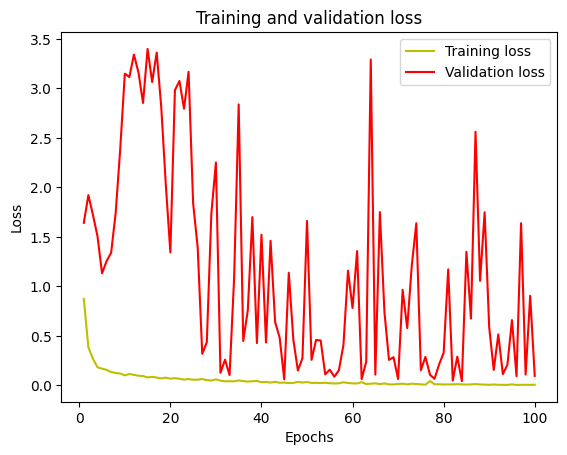

In [12]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


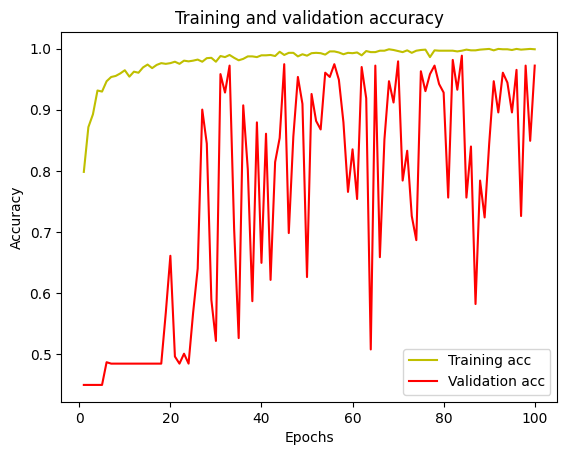

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The prediction for this image is:  [[4.6149897e-03 8.4418772e-08 9.9538487e-01]]
The actual label for this image is:  2


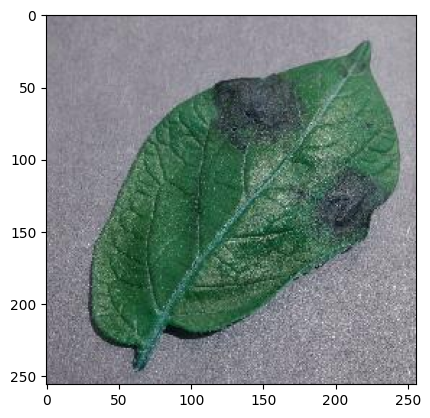

In [22]:
n=20  #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

In [24]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have already defined your model and X_test, y_test

# Step 1: Make predictions on the test set
y_pred_probs = model.predict(X_test)

# Step 2: Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 3: Use y_test directly if it's a 1D array of class labels
y_true = y_test  # Directly assign if y_test is 1D

# Step 4: Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Step 5: Generate a classification report
report = classification_report(y_true, y_pred, target_names=['Healthy', 'Early Blight', 'Late Blight'])

# Output results
print("Accuracy: ", accuracy)
print("\nClassification Report:\n", report)


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step
Accuracy:  0.9721577726218097

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.88      1.00      0.93        28
Early Blight       1.00      0.95      0.98       194
 Late Blight       0.96      0.99      0.97       209

    accuracy                           0.97       431
   macro avg       0.95      0.98      0.96       431
weighted avg       0.97      0.97      0.97       431



Confusion Matrix:
 [[ 28   0   0]
 [  1 185   8]
 [  3   0 206]]


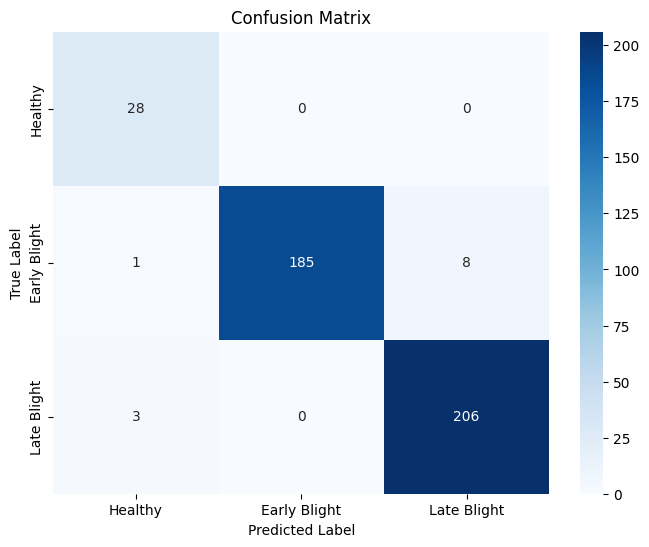

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_true and y_pred have already been defined

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Optional: Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Early Blight', 'Late Blight'],
            yticklabels=['Healthy', 'Early Blight', 'Late Blight'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
